The train forecasting model on the `Daily Temperature Data`.

Before starting copy this file and work on your own copy by following the below steps: <br>
`File > Save Copy in Drive`. Then add your name to the file (e.g., Assignment 09: More Advanced DL Applications - Zahraa Dhafer).
<br><br>
**Submission Deadline: Saturday, 3/19/2022 at 3:00 PM**

**Requirements:**

1. Import all necessary libraries.
2. Download the dataset (the link is provided below).
3. Read data from CSV file.
4. Prepare the data:
*   Use the data from Spain using the query method in the Country column.
*   Drop the columns that are not required.
*   Normalize the dataset.
*   Plot the histogram of the dataset before and after the normalization.
<br>
5. Create the time series dataset using Time Series Data Generator.
6. Create data from the generator and split the data into training and testing.
7. Make sure the data shape is (batch_size,length,1) and the target shape is (batch_size,1).
8. Get the max value of the dataset.
9. Create the Data Pipeline.
10. Create the Forecasting Model.<br>
11. Plot the model prediction.






[Dataset](https://www.kaggle.com/sudalairajkumar/daily-temperature-of-major-cities)






##1- Import all necessary libraries

In [1]:
#import libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import re
from sklearn import model_selection,preprocessing
import matplotlib.pyplot as plt
from tqdm import tqdm


##2- Download the dataset

In [2]:
# download the required dataset from kaggle 
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle datasets download -d sudalairajkumar/daily-temperature-of-major-cities

 39% 5.00M/12.9M [00:00<00:00, 44.9MB/s]
100% 12.9M/12.9M [00:00<00:00, 72.2MB/s]


In [4]:
! unzip '/content/daily-temperature-of-major-cities.zip'

Archive:  /content/daily-temperature-of-major-cities.zip
  inflating: city_temperature.csv    


##3- Read data from CSV file

In [320]:

#read data from csv file
data=pd.read_csv('/content/city_temperature.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [321]:

#show the data
data

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8


##4- Prepare the data



*   Use the data from Spain using the query method in the Country column.
*   Drop the columns that are not required.
*   Normalize the datase.
*   Plot the histagram of the dataset before and after the normalization.

In [323]:
#using query in Country and city columns
data=data[(data['Country']=='Spain') & (data['City']=='Madrid')]

In [324]:
#show the new data
data

,Region,Country,State,City,Month,Day,Year,AvgTemperature
921973,Europe,Spain,NaN,Madrid,1,1,1995,45.9
921974,Europe,Spain,NaN,Madrid,1,2,1995,40.0
921975,Europe,Spain,NaN,Madrid,1,3,1995,34.1
921976,Europe,Spain,NaN,Madrid,1,4,1995,37.0
921977,Europe,Spain,NaN,Madrid,1,5,1995,43.1
...,...,...,...,...,...,...,...,...
931234,Europe,Spain,NaN,Madrid,5,9,2020,67.0
931235,Europe,Spain,NaN,Madrid,5,10,2020,60.1
931236,Europe,Spain,NaN,Madrid,5,11,2020,60.6
931237,Europe,Spain,NaN,Madrid,5,12,2020,55.3


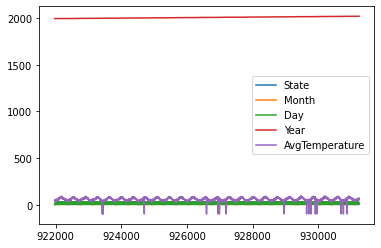

In [325]:
data.plot()

In [326]:
#Check for missing values
data.isnull().sum()

Region               0
Country              0
State             9266
City                 0
Month                0
Day                  0
Year                 0
AvgTemperature       0
dtype: int64

In [327]:
#info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9266 entries, 921973 to 931238
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          9266 non-null   object 
 1   Country         9266 non-null   object 
 2   State           0 non-null      object 
 3   City            9266 non-null   object 
 4   Month           9266 non-null   int64  
 5   Day             9266 non-null   int64  
 6   Year            9266 non-null   int64  
 7   AvgTemperature  9266 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 651.5+ KB


In [328]:
#Drop the columns that are not required.
data.drop(columns=['Region','Country','State','City','Month','Day' ,'Year'],axis=1,inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fce1e244d10>]],
      dtype=object)

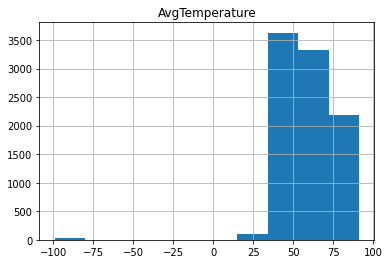

In [329]:
#plot histgram
data.hist()

In [330]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9266 entries, 921973 to 931238
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AvgTemperature  9266 non-null   float64
dtypes: float64(1)
memory usage: 144.8 KB


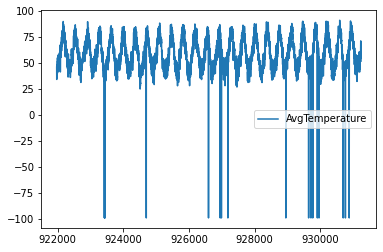

In [331]:
data.plot()

In [332]:
#normaliz to data
x_normalizer = preprocessing.StandardScaler()
x_normalizer.fit(data.to_numpy().reshape(-1,1))
x_norm = x_normalizer.transform(data.to_numpy().reshape(-1,1))

(array([  28.,    0.,    0.,    0.,    0.,    0.,   99., 3627., 3332.,
        2180.]),
 array([-9.46135615, -8.31955511, -7.17775407, -6.03595303, -4.89415199,
        -3.75235095, -2.61054991, -1.46874887, -0.32694783,  0.81485321,
         1.95665425]),
 <a list of 10 Patch objects>)

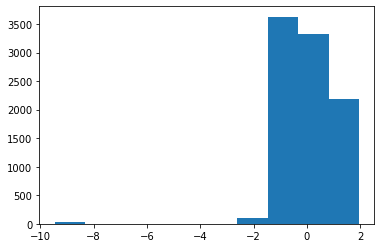

In [333]:
plt.hist(x_norm)

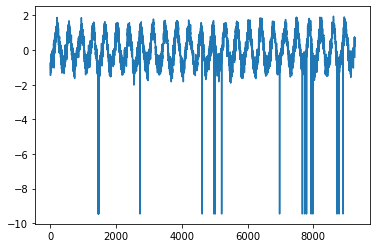

In [336]:
plt.plot(x_norm)#plot data with normaliz

In [334]:
data.isnull().sum()

AvgTemperature    0
dtype: int64

##5- Create the time series dataset using Time Series Data Generator

In [209]:
# create the time series dataset using Time Series Data Generator 
time_series=tf.keras.preprocessing.sequence.TimeseriesGenerator(x_norm,data.to_numpy(),length=7,batch_size=32)

In [210]:
# get the first batch of the dataset
x,y=time_series[0]

In [211]:
x[:3]

array([[[-0.75362085],
        [-1.10818012],
        [-1.4627394 ],
        [-1.2884645 ],
        [-0.92188627],
        [-0.70554502],
        [-0.8858294 ]],

       [[-1.10818012],
        [-1.4627394 ],
        [-1.2884645 ],
        [-0.92188627],
        [-0.70554502],
        [-0.8858294 ],
        [-1.07813273]],

       [[-1.4627394 ],
        [-1.2884645 ],
        [-0.92188627],
        [-0.70554502],
        [-0.8858294 ],
        [-1.07813273],
        [-0.92789575]]])

In [212]:
y[:2]

array([[40.5],
       [43. ]])

In [213]:
print(x.shape)# print the shape of the dataset
print(y.shape)

(32, 7, 1)
(32, 1)


##6- Create data from the generator and split the data into training and testing

In [214]:
x_data=np.array([])
y_data=np.array([])
for x,y in tqdm(time_series):
  x_data=np.append(x_data,x)
  y_data=np.append(y_data,y)


100%|██████████| 290/290 [00:00<00:00, 3374.43it/s]


In [215]:
print(x_data.shape)
print(y_data.shape)

(64813,)
(9259,)


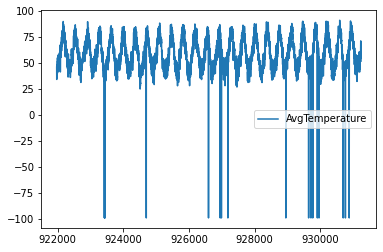

In [242]:
data.plot()

##7- Make sure the data shape is (batch_size,length,1) and the target shape is (batch_size,1)

In [216]:
x=x_data.reshape(-1,7,1)
y=y_data.reshape(-1,1)



In [217]:
print(x.shape)
print(y.shape)

(9259, 7, 1)
(9259, 1)


##8- Get the max value of the dataset

In [218]:
print(x_normalizer.scale_ )
print(x_normalizer.var_)
print(x_normalizer.mean_)
print(x_normalizer.n_samples_seen_)

[16.64037721]
[276.90215357]
[58.44053529]
9266


##9- Create the Data Pipeline

In [219]:
def create_pipline(x,y):
  
  data=tf.data.Dataset.from_tensor_slices((x,y))
  data=data.shuffle(1024,reshuffle_each_iteration=True)
  data=data.batch(32)
  data=data.prefetch(tf.data.AUTOTUNE)
  return data

train_dataset=create_pipline(x[:-200],y[:-200])  


##10- Create the Forcasting Model

###1-model_1

In [305]:
#create model_1
model_1=tf.keras.Sequential([
                             tf.keras.layers.Input((7,1)),
                             tf.keras.layers.Conv1D(filters=16,kernel_size=3,padding='causal',activation=tf.nn.leaky_relu),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
                             tf.keras.layers.Dense(1),
                             tf.keras.layers.Lambda(lambda x:(x+58.44053529)*16.64037721)
                             


])


In [306]:

model_1.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.Huber())
model1=model_1.fit(train_dataset,epochs=10,validation_data=(x[-200:],y[-200:]))

Epoch 1/10
284/284 [==============================] - 17s 34ms/step - loss: 169.4558 - val_loss: 8.5332
Epoch 2/10
284/284 [==============================] - 8s 27ms/step - loss: 4.8103 - val_loss: 3.7072
Epoch 3/10
284/284 [==============================] - 8s 28ms/step - loss: 3.8516 - val_loss: 3.2948
Epoch 4/10
284/284 [==============================] - 8s 28ms/step - loss: 3.4105 - val_loss: 2.8431
Epoch 5/10
284/284 [==============================] - 8s 27ms/step - loss: 3.1034 - val_loss: 2.6774
Epoch 6/10
284/284 [==============================] - 8s 28ms/step - loss: 2.9816 - val_loss: 2.5945
Epoch 7/10
284/284 [==============================] - 8s 28ms/step - loss: 2.9068 - val_loss: 2.8392
Epoch 8/10
284/284 [==============================] - 8s 28ms/step - loss: 2.8705 - val_loss: 2.5134
Epoch 9/10
284/284 [==============================] - 8s 27ms/step - loss: 2.8080 - val_loss: 2.3976
Epoch 10/10
284/284 [==============================] - 8s 27ms/step - loss: 2.8519 - val

In [307]:
#predict
pred=model_1.predict(x[-100:])

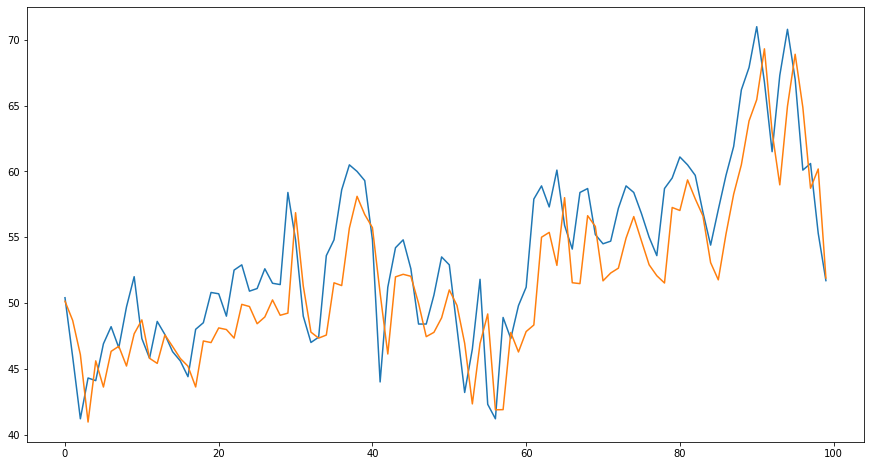

In [308]:

plt.figure(figsize=(15,8))
true_y=y[-100:]
plt.plot(true_y)
plt.plot(pred.reshape(-1))


###2-model_2

In [235]:
#create model_2
model_2=tf.keras.Sequential([
                             tf.keras.layers.Input((7,1)),
                             tf.keras.layers.Conv1D(filters=16,kernel_size=3,padding='causal',activation=tf.nn.relu),
                             tf.keras.layers.GRU(32,return_sequences=True),
                             tf.keras.layers.GRU(64),
                             tf.keras.layers.Dense(1),
                             tf.keras.layers.Lambda(lambda x:(x+58.44053529)*16.64037721)
                        
                             


])

In [236]:
model_2.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.Huber())
model2=model_2.fit(train_dataset,epochs=10,validation_data=(x[-200:],y[-200:]))

Epoch 1/10
284/284 [==============================] - 8s 14ms/step - loss: 606.5755 - val_loss: 430.3362
Epoch 2/10
284/284 [==============================] - 3s 11ms/step - loss: 263.8996 - val_loss: 113.4347
Epoch 3/10
284/284 [==============================] - 3s 10ms/step - loss: 26.7669 - val_loss: 9.9009
Epoch 4/10
284/284 [==============================] - 3s 11ms/step - loss: 12.1933 - val_loss: 9.6881
Epoch 5/10
284/284 [==============================] - 3s 11ms/step - loss: 12.1853 - val_loss: 9.1915
Epoch 6/10
284/284 [==============================] - 3s 9ms/step - loss: 12.1945 - val_loss: 10.1210
Epoch 7/10
284/284 [==============================] - 3s 11ms/step - loss: 8.3939 - val_loss: 3.0413
Epoch 8/10
284/284 [==============================] - 3s 11ms/step - loss: 2.8508 - val_loss: 2.5208
Epoch 9/10
284/284 [==============================] - 4s 15ms/step - loss: 2.6899 - val_loss: 2.4751
Epoch 10/10
284/284 [==============================] - 6s 19ms/step - loss: 2.6

In [310]:
pred=model_2.predict(x[-100:])

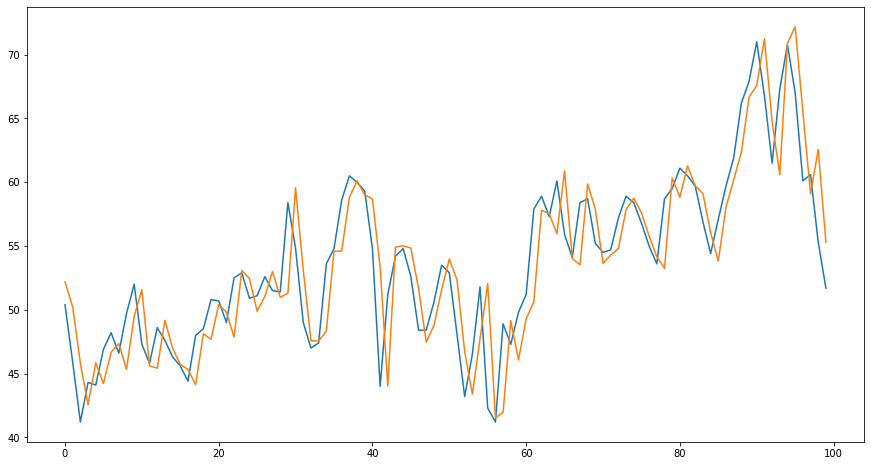

In [311]:
plt.figure(figsize=(15,8))
true_y=y[-100:]
plt.plot(true_y)
plt.plot(pred.reshape(-1))

###3-model_3

In [239]:
#create model_3
model_3=tf.keras.Sequential([
                             tf.keras.layers.Input((7,1)),
                             tf.keras.layers.Conv1D(filters=16,kernel_size=3,padding='causal',
                                                    activation=tf.nn.leaky_relu),
                             tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32,return_sequences=True)),
                             tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64)),
                             tf.keras.layers.Dense(1),
                             tf.keras.layers.Lambda(lambda x:(x+58.44053529)*16.64037721)




])

In [240]:
model_3.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.Huber())
model3=model_3.fit(train_dataset,epochs=10,validation_data=(x[-200:],y[-200:]))

Epoch 1/10
284/284 [==============================] - 17s 33ms/step - loss: 377.2046 - val_loss: 31.6797
Epoch 2/10
284/284 [==============================] - 7s 23ms/step - loss: 12.4440 - val_loss: 10.2967
Epoch 3/10
284/284 [==============================] - 4s 15ms/step - loss: 9.3156 - val_loss: 3.1975
Epoch 4/10
284/284 [==============================] - 4s 16ms/step - loss: 2.9411 - val_loss: 2.4975
Epoch 5/10
284/284 [==============================] - 6s 21ms/step - loss: 2.7118 - val_loss: 2.4107
Epoch 6/10
284/284 [==============================] - 4s 14ms/step - loss: 2.6689 - val_loss: 2.3634
Epoch 7/10
284/284 [==============================] - 4s 14ms/step - loss: 2.6109 - val_loss: 2.8155
Epoch 8/10
284/284 [==============================] - 4s 14ms/step - loss: 2.6615 - val_loss: 2.3538
Epoch 9/10
284/284 [==============================] - 4s 15ms/step - loss: 2.6113 - val_loss: 2.3518
Epoch 10/10
284/284 [==============================] - 4s 15ms/step - loss: 2.6154 - 

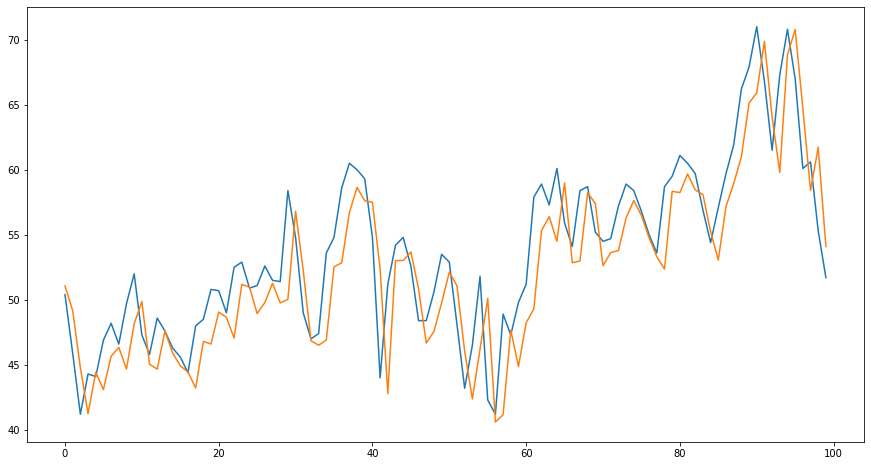

In [312]:
pred3=model_3.predict(x[-100:])
plt.figure(figsize=(15,8))
true_y=y[-100:]
plt.plot(true_y)
plt.plot(pred3.reshape(-1))

###pred

In [243]:
x[-1]

array([[ 0.18385789],
       [ 0.53240769],
       [ 0.74273946],
       [ 0.51437925],
       [ 0.09972519],
       [ 0.12977258],
       [-0.18872981]])

In [309]:
b=([[ 0.18385789],
       [ 0.53240769],
       [ 0.74273946],
       [ 0.51437925],
       [ 0.09972519],
       [ 0.12977258],
       [-0.18872981]])

def make_pred(x,days=1):
    pred_list=[]
    for i in range(days):
        
        pred = model_1.predict([x])
        pred_list.append(pred.reshape(-1)[0])
        x.pop(0)
        x.append([pred[0][0]/3200])
       
    return pred_list

pred =make_pred(b)
true_y=y[-1]
print(pred)
print(true_y)

[51.896885]
[51.7]


In [314]:
#the best model is Bidirectional LSTM